# Inspect Dataset
Reference 1: https://www.kaggle.com/karthik7395/exploratory-data-analysis

Reference 2: https://www.kaggle.com/frtgnn/yam-potatoes-thanksgiving-2018

Dataset: https://www.kaggle.com/c/dont-call-me-turkey/data

In [71]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import sklearn

import xgboost as xgb

import seaborn as sns

from itertools import chain

import matplotlib.pyplot as plt
%matplotlib inline



#### BEGIN Plotly #####
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#### END Plotly

In [2]:
filename_train = './datasets/train.json'
filename_test = './datasets/test.json'

train = pd.read_json(filename_train)
test = pd.read_json(filename_test)

In [3]:
print(train.shape)
print(test.shape)

(1195, 5)
(1196, 4)


In [4]:
train.head()

,audio_embedding,end_time_seconds_youtube_clip,is_turkey,start_time_seconds_youtube_clip,vid_id
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",70,0,60,kDCk3hLIVXo
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",40,1,30,DPcGzqHoo7Y
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",240,1,230,7yM63MTHh5k
3,"[[151, 0, 162, 88, 171, 71, 47, 90, 179, 190, ...",520,1,510,luG3RmUAxxM
4,"[[162, 17, 187, 111, 211, 105, 92, 67, 203, 15...",10,0,0,PIm3cjxTpOk


In [5]:
test.head()

,audio_embedding,end_time_seconds_youtube_clip,start_time_seconds_youtube_clip,vid_id
0,"[[177, 20, 226, 132, 198, 81, 111, 59, 132, 18...",10,0,pyKh38FXD3E
1,"[[169, 21, 204, 161, 195, 72, 60, 39, 152, 184...",40,30,THhP1idrWXA
2,"[[165, 13, 198, 141, 199, 81, 173, 54, 119, 11...",40,30,jsw3T6GY2Nw
3,"[[167, 18, 188, 159, 198, 63, 156, 36, 179, 22...",24,14,nFkXTMHcjMU
4,"[[178, 32, 181, 100, 198, 46, 82, 83, 136, 227...",40,30,Au8g9kAlrLQ


In [6]:
train.describe()

,end_time_seconds_youtube_clip,is_turkey,start_time_seconds_youtube_clip
count,1195.000000,1195.000000,1195.000000
mean,87.013389,0.410879,77.085356
std,107.750860,0.492199,107.697523
min,2.000000,0.000000,0.000000
25%,40.000000,0.000000,30.000000
50%,40.000000,0.000000,30.000000
75%,90.000000,1.000000,80.000000
max,600.000000,1.000000,590.000000


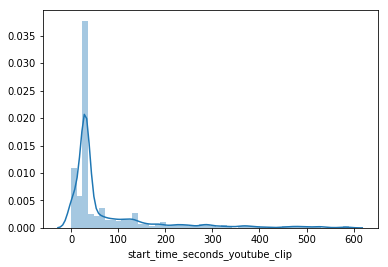

In [7]:
sns.distplot(train['start_time_seconds_youtube_clip'])

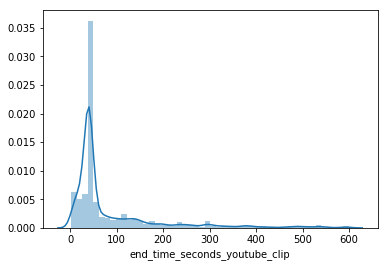

In [8]:
sns.distplot(train['end_time_seconds_youtube_clip'])

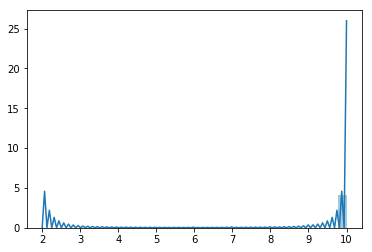

In [9]:
sns.distplot(train['end_time_seconds_youtube_clip'] - train['start_time_seconds_youtube_clip'])

#### Check whether end time always is greater than start time

In [10]:
min(train['end_time_seconds_youtube_clip'] - train['start_time_seconds_youtube_clip'])

2

In [11]:
max(train['end_time_seconds_youtube_clip'] - train['start_time_seconds_youtube_clip'])

10

#### Observation:
The clip duration is not more than 10.

### Check Class Imbalance

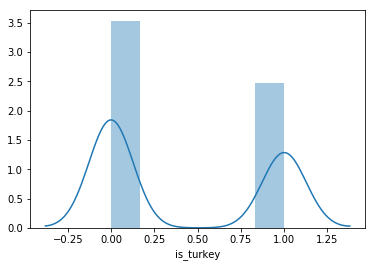

In [12]:
sns.distplot(train['is_turkey'])

#### Observation
The class imbalance of is-turkey and not-turkey is not so severe.

### Check the correlation between class and total time

In [13]:
train['total_time'] = train['end_time_seconds_youtube_clip'] - train['start_time_seconds_youtube_clip']

In [14]:
train.head()

,audio_embedding,end_time_seconds_youtube_clip,is_turkey,start_time_seconds_youtube_clip,vid_id,total_time
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",70,0,60,kDCk3hLIVXo,10
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",40,1,30,DPcGzqHoo7Y,10
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",240,1,230,7yM63MTHh5k,10
3,"[[151, 0, 162, 88, 171, 71, 47, 90, 179, 190, ...",520,1,510,luG3RmUAxxM,10
4,"[[162, 17, 187, 111, 211, 105, 92, 67, 203, 15...",10,0,0,PIm3cjxTpOk,10


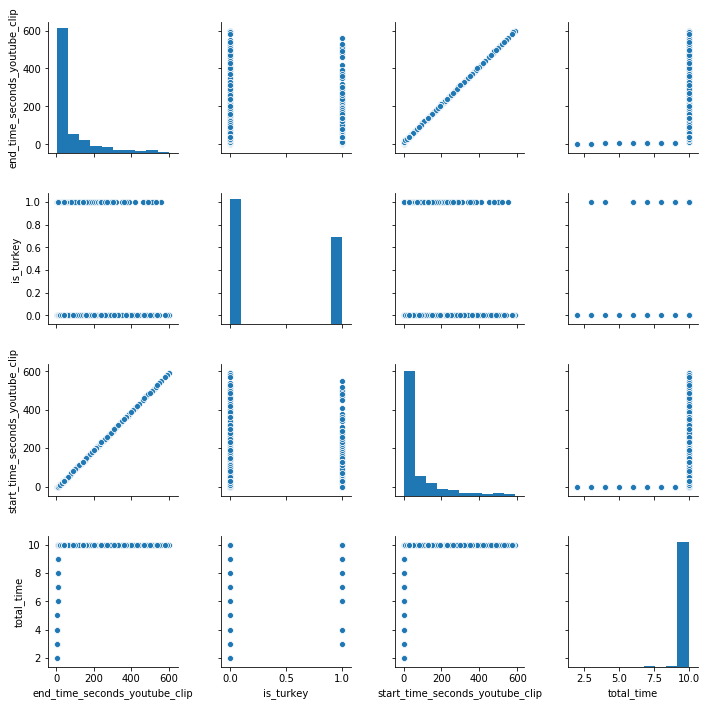

In [15]:
sns.pairplot(train.iloc[:, 1:])

#### Observation
When the total time is small, it is not turkey

# Inspect Audio Embedding

In [16]:
audio_embeddings = train['audio_embedding']

In [17]:
type(audio_embeddings[0])

list

In [18]:
len(audio_embeddings[0])

10

In [19]:
len(audio_embeddings[0][0])

128

In [20]:
audio = np.array(audio_embeddings[0])

In [21]:
audio.shape

(10, 128)

In [22]:
np.max(audio)

255

In [23]:
np.min(audio)

0

In [24]:
audio_embeddings[:5].map(lambda embed: np.array(embed).ravel())

0    [172, 34, 216, 110, 208, 46, 95, 66, 161, 125,...
1    [169, 20, 165, 102, 205, 62, 110, 103, 211, 18...
2    [148, 8, 138, 60, 237, 48, 121, 108, 145, 177,...
3    [151, 0, 162, 88, 171, 71, 47, 90, 179, 190, 1...
4    [162, 17, 187, 111, 211, 105, 92, 67, 203, 152...
Name: audio_embedding, dtype: object

#### Flatten list of list to 1d array

In [25]:
embedding = audio_embeddings.map(lambda embed: list(chain.from_iterable(embed)))

In [26]:
embedding.shape

(1195,)

In [27]:
embedding_df = pd.DataFrame(list(embedding))

In [28]:
embedding_df.shape

(1195, 1280)

In [29]:
embedding_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,172,34,216,110,208,46,95,66,161,125,...,0.0,135.0,133.0,151.0,0.0,3.0,206.0,101.0,104.0,255.0
1,169,20,165,102,205,62,110,103,211,187,...,0.0,0.0,119.0,205.0,27.0,151.0,226.0,44.0,0.0,255.0
2,148,8,138,60,237,48,121,108,145,177,...,0.0,62.0,79.0,204.0,0.0,74.0,243.0,255.0,95.0,255.0
3,151,0,162,88,171,71,47,90,179,190,...,0.0,255.0,207.0,52.0,178.0,129.0,186.0,0.0,0.0,255.0
4,162,17,187,111,211,105,92,67,203,152,...,62.0,224.0,15.0,172.0,0.0,2.0,255.0,144.0,34.0,255.0


### Check Null cells

In [30]:
embedding_df.isnull().any().any()

True

### Check the number of NULL cells

In [31]:
embedding_df.isnull().sum().sum()

19840

### Plot NULL Features

In [32]:
np.argmax(embedding_df.isnull().any().values)

256

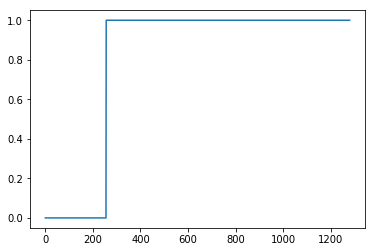

In [33]:
plt.plot(embedding_df.isnull().any())

##### Obervation
When features is at index 256/128=2, there are NULL cells

### Fill NULL cells

In [34]:
embedding_df = embedding_df.fillna(-1)

In [35]:
embedding_df.isnull().any().any()

False

In [42]:
embedding_df.shape

(1195, 1280)

# PCA Analysis

In [44]:
pca = PCA(n_components=50)
pca_result = pca.fit_transform(embedding_df.values)

In [52]:
pca

(1195, 50)

In [46]:
cdf = np.cumsum(pca.explained_variance_ratio_)

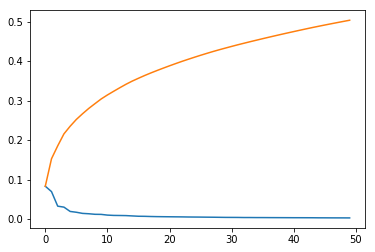

In [54]:
plt.plot(pca.explained_variance_ratio_)
plt.plot(cdf)

#### Observation
The first 50 principal components only comprise 50% of importance.

# Draw tSNE plot to Exame the Difficality of Classification

In [62]:
tsne = TSNE()

%time tsne_results = tsne.fit_transform(embedding_df.values)

CPU times: user 11.6 s, sys: 0 ns, total: 11.6 s
Wall time: 11.6 s


In [65]:
trace = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    mode = 'markers',
    marker = dict(
        size = 8,
        color = train.is_turkey.values,
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
    )
)
data = [trace]

layout = go.Layout(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= True
             )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='TSNE')

#### Observation
The data is well seperated.

# Train Flattened Audio Embeddings using XGBClassifier

In [68]:
model = xgb.XGBClassifier()

y = train['is_turkey']
X = embedding_df.values

%time model.fit(embedding_df.values, y)

CPU times: user 5.93 s, sys: 19.7 ms, total: 5.95 s
Wall time: 5.98 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [80]:
pred = model.predict(X)
pred_prob = model.predict_proba(X)

accuracy = sklearn.metrics.accuracy_score(y, pred)
roc_score = sklearn.metrics.roc_auc_score(y, pred)

In [81]:
print('Accuracy: {}'.format(accuracy))
print('ROC:{}'.format(roc_score))

Accuracy: 1.0
ROC:1.0


# Plot ROC-AUC Curve

In [84]:
fpr, tpr, threadshold = sklearn.metrics.roc_curve(y, pred)

In [107]:
# False Positive Rate (FP) - x-axis
fpr

array([0., 0., 1.])

In [108]:
# True Positive Rate (TP) - y-axis
tpr

array([0., 1., 1.])

Text(0, 0.5, 'True Positive Rate (TP)')

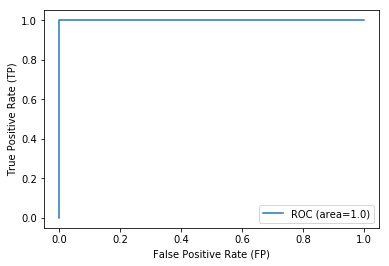

In [109]:

plt.plot(fpr, tpr, label='ROC (area={})'.format(roc_score))

plt.legend()

plt.xlabel('False Positive Rate (FP)')
plt.ylabel('True Positive Rate (TP)')